<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       

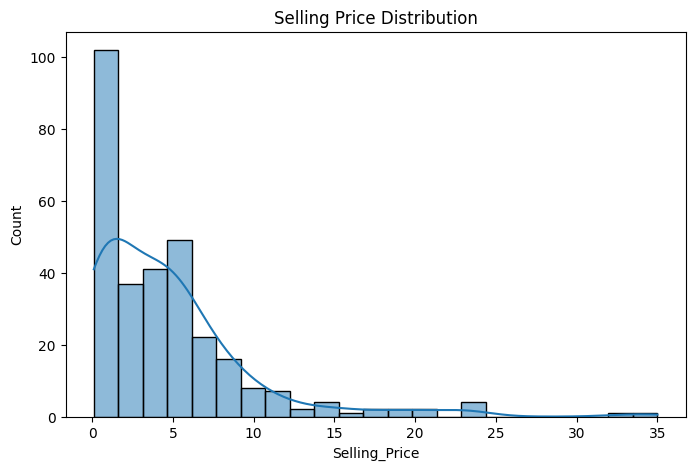

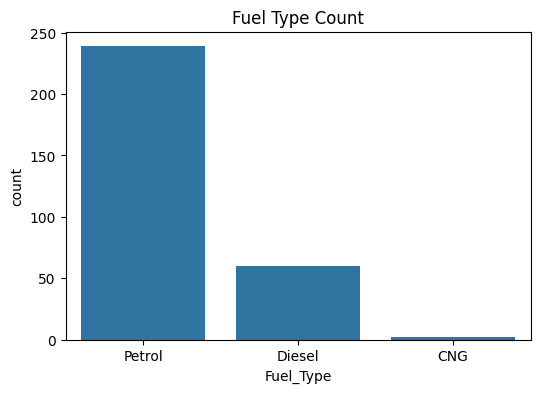

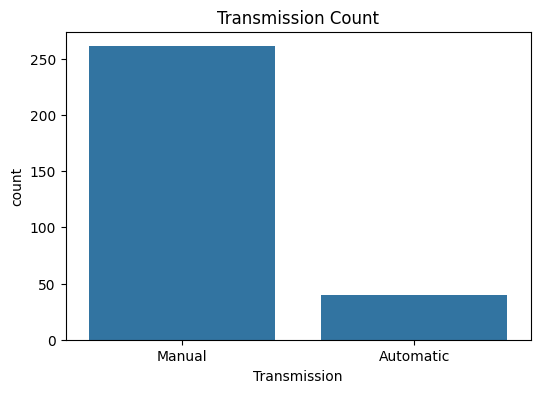

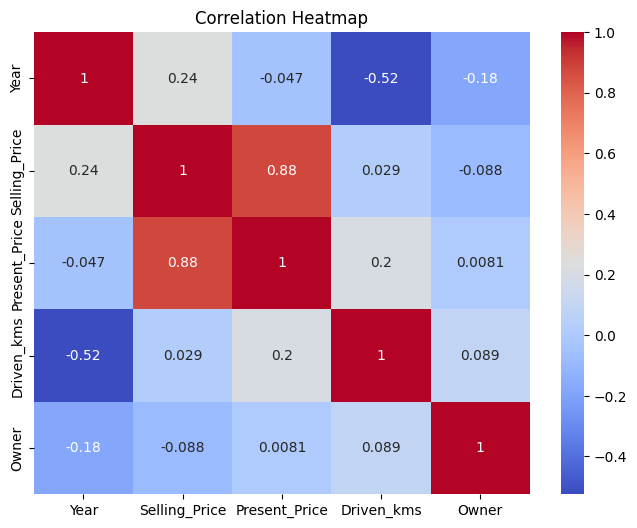

               Model  R² Score       MAE      RMSE
0  Linear Regression  0.872351  1.118751  1.714782
1      Random Forest  0.961700  0.625577  0.939293
Best model saved as car_price_model.pkl

Conclusion:
The best model is Random Forest with R² = 0.9617

--- Demo Prediction ---
Predicted Selling Price for sample car: 3.67 lakhs


In [4]:
# ============================================
# 🚗 Car Price Prediction - Machine Learning Project
# Author: Abhishek Patel
# ============================================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle

# 2️⃣ Load Dataset
df = pd.read_csv("cardata.csv")
df.head()

# Basic info
print(df.info())
print(df.describe())

# 3️⃣ Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,5))
sns.histplot(df['Selling_Price'], kde=True)
plt.title("Selling Price Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Fuel_Type', data=df)
plt.title("Fuel Type Count")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Transmission', data=df)
plt.title("Transmission Count")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 4️⃣ Feature Engineering
df['Car_Age'] = 2025 - df['Year']
df['Brand'] = df['Car_Name'].apply(lambda x: x.split(' ')[0])
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

# 5️⃣ Data Preprocessing
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

cat_cols = ['Fuel_Type', 'Selling_type', 'Transmission', 'Brand']

preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
    remainder='passthrough'
)

# 6️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7️⃣ Model Training & Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []
best_model = None
best_score = -float('inf')

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    score = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append([name, score, mae, rmse])
    
    if score > best_score:
        best_score = score
        best_model = pipe

# 8️⃣ Results Table
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE", "RMSE"])
print(results_df)

# 9️⃣ Save Best Model
with open("car_price_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Best model saved as car_price_model.pkl")

# 🔟 Conclusion
print("\nConclusion:")
print(f"The best model is {results_df.loc[results_df['R² Score'].idxmax(), 'Model']} with R² = {best_score:.4f}")

# 1️⃣1️⃣ Demo Prediction (without retraining)
print("\n--- Demo Prediction ---")
sample_car = pd.DataFrame({
    'Fuel_Type': ['Petrol'],
    'Selling_type': ['Dealer'],
    'Transmission': ['Manual'],
    'Brand': ['Maruti'],
    'Present_Price': [5.5],
    'Driven_kms': [35000],
    'Owner': [0],
    'Car_Age': [5]
})

predicted_price = best_model.predict(sample_car)[0]
print(f"Predicted Selling Price for sample car: {predicted_price:.2f} lakhs")
